In [1]:
import pandas as pd

bc = pd.read_csv('C:\\Users\\sjjung\\Desktop\\contestData\\bccard.csv')
bc


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519292,202103,20,여가/스포츠,2013,여행,여성,30대,1인가구,서울특별시,영등포구,영등포동7가,1411368,7
519293,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,1386040,63
519294,202103,11,패션잡화,1113,시계/주얼리,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,390818,7
519295,202103,16,식품,1610,가공식품,남성,40대,초중고자녀가구,서울특별시,영등포구,영등포동7가,327592,7


In [2]:
# 라이브러리
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
%matplotlib inline

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family = font_name)

plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
pd.set_option('display.max_columns',None)
warnings.filterwarnings(action='ignore') # Warning Message 안 보이게
import pandas.util.testing as tm

import matplotlib as mpl # 고해상도 Plot 을 위해 DPI 조절
mpl.rcParams['figure.dpi']=150



In [3]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB


In [4]:
# 파생변수 추가 : 연령
# 연령 컬럼 1,2,3,4,5,6
bc['연령'].unique() # array(['40대', '20대', '30대', '50대', '60대 이상', '20세 미만'], dtype=object)

def age(x):
    if x == '20세 미만':
        return x.replace(x,'1')
    elif x == '20대':
        return x.replace(x,'2')
    elif x == '30대':
        return x.replace(x,'3')
    elif x == '40대':
        return x.replace(x,'4')
    elif x == '50대':
        return x.replace(x,'5')
    else:
        return x.replace(x,'6')

bc['연령'] = bc['연령'].apply(age)
bc['연령'] = bc['연령'].astype('int64')

In [5]:
bc.고객소재지_광역시도.unique()

array(['서울특별시', '경기도', '인천광역시'], dtype=object)

In [6]:
len(bc.고객소재지_시군구.unique()) # 서울 25개 자치구, 

38

In [7]:
bc['고객소재지_시군구'][bc['고객소재지_광역시도']=='서울특별시'].unique() # 서울 25개 자치구

array(['구로구', '강동구', '광진구', '양천구', '중랑구', '강북구', '동작구', '마포구', '도봉구',
       '송파구', '금천구', '강서구', '용산구', '은평구', '강남구', '노원구', '성북구', '관악구',
       '서초구', '종로구', '서대문구', '영등포구', '성동구', '중구', '동대문구'], dtype=object)

In [8]:
bc['고객소재지_읍면동'][bc['고객소재지_광역시도']=='서울특별시'].unique() # 서울 426개 행정동 (서울시 사이트 425개 행정동)

array(['궁동', '길동', '능동', '목동', '묵동', '번동', '본동', '중동', '창동', '항동', '가락동',
       '가산동', '가양동', '갈월동', '갈현동', '강일동', '개봉동', '개포동', '거여동', '고덕동',
       '고척동', '공덕동', '공릉동', '공항동', '광장동', '구로동', '구산동', '구의동', '군자동',
       '길음동', '남현동', '내곡동', '내수동', '냉천동', '녹번동', '논현동', '누상동', '당산동',
       '대림동', '대방동', '대신동', '대조동', '대치동', '대현동', '대흥동', '도곡동', '도림동',
       '도봉동', '도선동', '도원동', '도화동', '독산동', '돈암동', '동교동', '동숭동', '동작동',
       '둔촌동', '등촌동', '마곡동', '마장동', '마천동', '마포동', '망우동', '망원동', '면목동',
       '명일동', '무악동', '문배동', '문정동', '미근동', '미아동', '반포동', '방배동', '방이동',
       '방학동', '방화동', '보광동', '봉천동', '부암동', '불광동', '사근동', '사당동', '사직동',
       '산천동', '삼성동', '삼전동', '상계동', '상도동', '상봉동', '상수동', '상암동', '상일동',
       '서교동', '서초동', '석관동', '석촌동', '성내동', '성북동', '성산동', '세곡동', '송정동',
       '송파동', '수색동', '수서동', '수송동', '수유동', '순화동', '숭인동', '시흥동', '신교동',
       '신길동', '신내동', '신당동', '신림동', '신사동', '신설동', '신수동', '신원동', '신월동',
       '신정동', '신천동', '신촌동', '쌍문동', '아현동', '암사동', '양재동', '역삼동', '역촌동',
       '연남동', '연

In [9]:
bc['고객소재지_시군구'][bc['고객소재지_광역시도']=='경기도'].unique() # 경기도 4개

array(['용인시', '수원시', '고양시', '성남시'], dtype=object)

In [10]:
len(bc['고객소재지_읍면동'][bc['고객소재지_광역시도']=='경기도'].unique()) #177개

177

In [11]:
bc['고객소재지_시군구'][bc['고객소재지_광역시도']=='인천광역시'].unique() # 인천광역시 10개구

array(['서구', '남동구', '부평구', '강화군', '계양구', '미추홀구', '중구', '연수구', '동구', '옹진군'],
      dtype=object)

In [12]:
len(bc['고객소재지_읍면동'][bc['고객소재지_광역시도']=='인천광역시'].unique()) # 인천광역시 110개 동

110

In [13]:
len(bc.고객소재지_읍면동.unique())

685

In [14]:
# 성별 컬럼 여 1, 남 0
bc['성별'] = bc['성별'].apply(lambda x:1 if x=='여성' else 0)

In [15]:
# 파생변수 추가 매출평균
pd.options.display.float_format = '{:,.0f}'.format
bc['매출평균'] = bc['매출금액']/bc['매출건수']

In [16]:
# 파생변수2 추가 mz세대 -> 연령(1,2,3) -> 1, 나머지 0
bc['mz세대'] = bc['연령'].apply(lambda x:1 if x in (1,2,3) else 0)
bc

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수,매출평균,mz세대
0,201903,10,의류,1010,여성의류,1,4,초중고자녀가구,서울특별시,구로구,궁동,782521,13,"60,194",0
1,201903,21,e상품/서비스,2110,o2o서비스,1,2,신혼영유아가구,서울특별시,구로구,궁동,963789,29,"33,234",1
2,201903,19,출산/육아,1913,육아용품서비스,1,3,신혼영유아가구,서울특별시,구로구,궁동,924309,46,"20,094",1
3,201903,21,e상품/서비스,2111,e머니/상품권,1,3,신혼영유아가구,서울특별시,구로구,궁동,1089360,54,"20,173",1
4,201903,17,생활,1710,생활용품,1,3,신혼영유아가구,서울특별시,구로구,궁동,1656740,58,"28,564",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519292,202103,20,여가/스포츠,2013,여행,1,3,1인가구,서울특별시,영등포구,영등포동7가,1411368,7,"201,624",1
519293,202103,21,e상품/서비스,2110,o2o서비스,0,3,1인가구,서울특별시,영등포구,영등포동7가,1386040,63,"22,001",1
519294,202103,11,패션잡화,1113,시계/주얼리,1,3,신혼영유아가구,서울특별시,영등포구,영등포동7가,390818,7,"55,831",1
519295,202103,16,식품,1610,가공식품,0,4,초중고자녀가구,서울특별시,영등포구,영등포동7가,327592,7,"46,799",0


In [17]:
x = bc[bc['mz세대']==1]
xx = x.groupby('고객소재지_광역시도')['mz세대'].count().reset_index()
y  = bc.groupby('고객소재지_광역시도')['mz세대'].count().reset_index()
xx

,고객소재지_광역시도,mz세대
0,경기도,68697
1,서울특별시,151724
2,인천광역시,36354


<AxesSubplot:title={'center':'시도별 mz세대 인원수'}, xlabel='광역시도'>

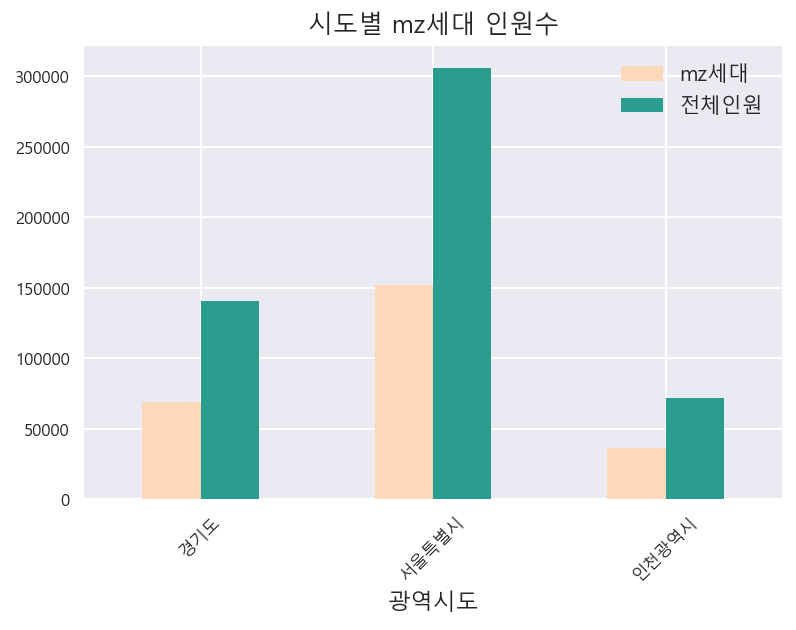

In [18]:
pd.options.display.float_format = '{:.3f}'.format # 소숫점 3자리까지 표현해주는 판다스 옵션


mz_zone = pd.merge(xx,y,on='고객소재지_광역시도')
mz_zone.columns=['광역시도','mz세대','전체인원']

mz_zone['mz세대'] = mz_zone['mz세대'].astype('float')
mz_zone['전체인원'] = mz_zone['전체인원'].astype('float')
mz_zone['분포']= mz_zone.mz세대/mz_zone.전체인원

my_colors = [ '#ffd7ba','#2a9d8f']
mz_zone.plot.bar(x='광역시도',y=['mz세대','전체인원'],rot=45,color=my_colors,fontsize=8,title="시도별 mz세대 인원수",figsize=(6,4))

In [19]:
mz_zone

,광역시도,mz세대,전체인원,분포
0,경기도,68697.000,140985.000,0.487
1,서울특별시,151724.000,306122.000,0.496
2,인천광역시,36354.000,72190.000,0.504


In [20]:
mz_zone[['광역시도','분포']]

,광역시도,분포
0,경기도,0.487
1,서울특별시,0.496
2,인천광역시,0.504


<AxesSubplot:title={'center':'시군구별 mz세대 인원수'}, xlabel='시군구'>

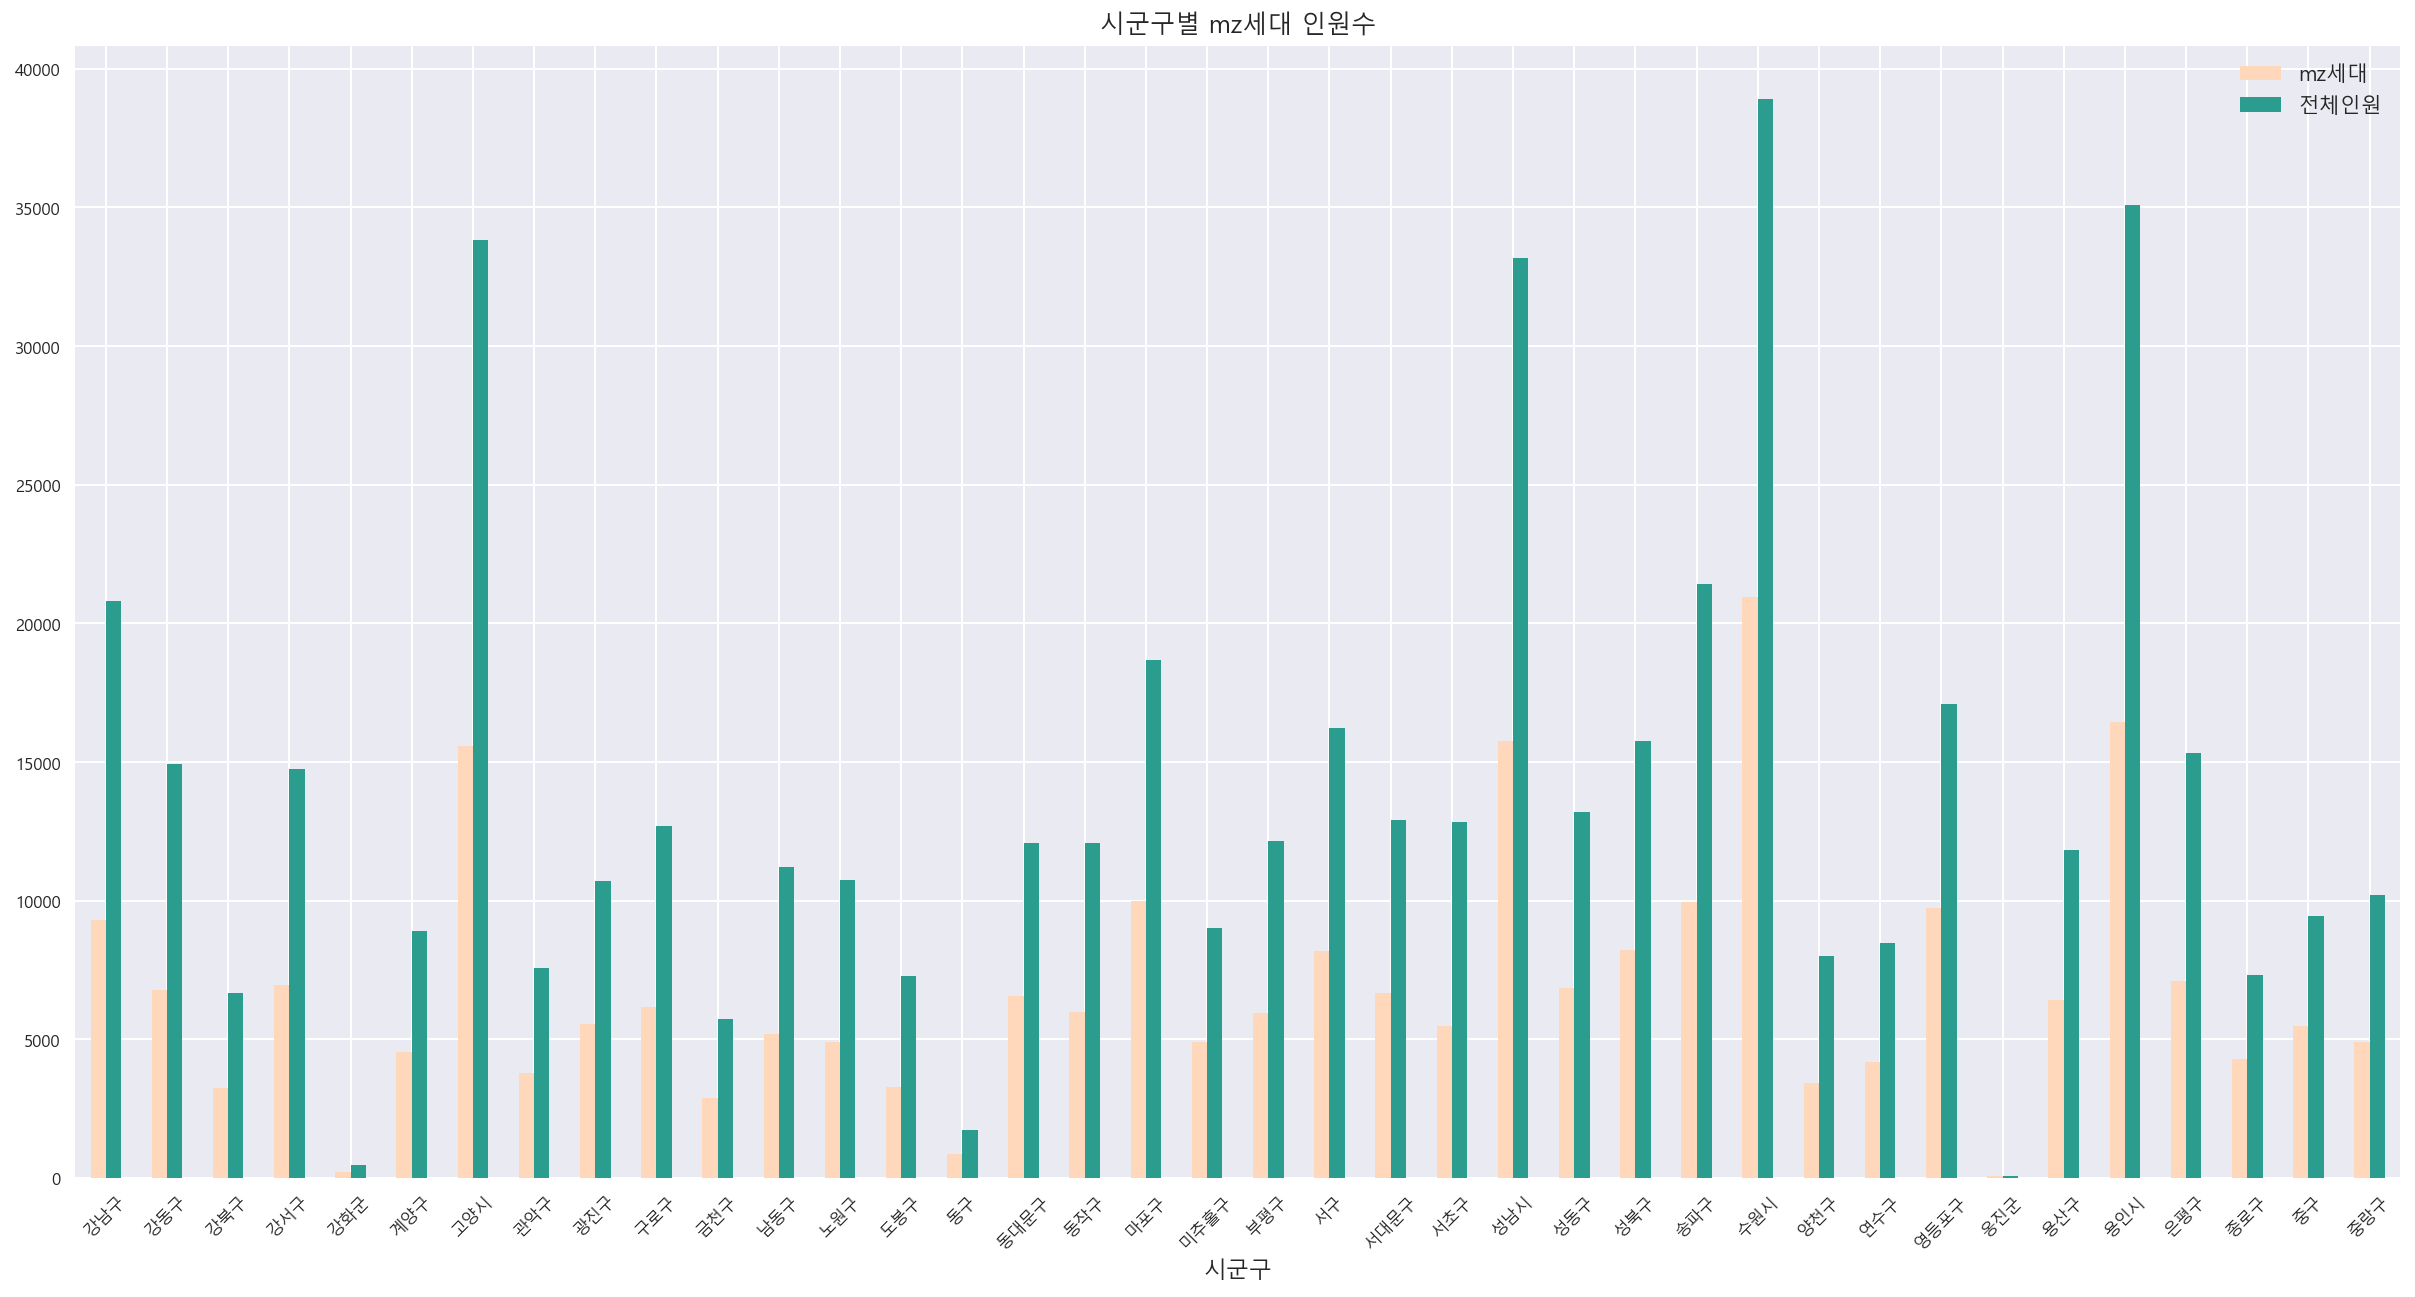

In [21]:
x = bc[bc['mz세대']==1]
xx = x.groupby('고객소재지_시군구')['mz세대'].count().reset_index()
y  = bc.groupby('고객소재지_시군구')['mz세대'].count().reset_index()

pd.options.display.float_format = '{:.3f}'.format # 소숫점 3자리까지 표현해주는 판다스 옵션


mz_zone2 = pd.merge(xx,y,on='고객소재지_시군구')
mz_zone2.columns=['시군구','mz세대','전체인원']

mz_zone2['mz세대'] = mz_zone2['mz세대'].astype('float')
mz_zone2['전체인원'] = mz_zone2['전체인원'].astype('float')
mz_zone2['분포']= mz_zone2.mz세대/mz_zone2.전체인원

my_colors = [ '#ffd7ba','#2a9d8f']
mz_zone2.plot.bar(x='시군구',y=['mz세대','전체인원'],rot=45,color=my_colors,fontsize=8,title="시군구별 mz세대 인원수",figsize=(20,10))

In [22]:
mz_zone2[['시군구','분포']].sort_values(by='분포',ascending=False).head(10)

,시군구,분포
31,옹진군,0.838
35,종로구,0.585
36,중구,0.582
30,영등포구,0.569
18,미추홀구,0.545
15,동대문구,0.543
32,용산구,0.542
27,수원시,0.539
17,마포구,0.534
25,성북구,0.521


In [23]:
mz_zone2[['시군구','분포']].sort_values(by='분포',ascending=False).tail(10)

,시군구,분포
26,송파구,0.465
34,은평구,0.464
11,남동구,0.463
6,고양시,0.460
12,노원구,0.457
1,강동구,0.455
13,도봉구,0.449
0,강남구,0.447
28,양천구,0.430
22,서초구,0.429


In [24]:
bc_mz = bc[bc['mz세대']==1]
mz_seoul = bc_mz[bc_mz['고객소재지_광역시도']=='서울특별시']
mz_seoul

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수,매출평균,mz세대
1,201903,21,e상품/서비스,2110,o2o서비스,1,2,신혼영유아가구,서울특별시,구로구,궁동,963789,29,33234.103,1
2,201903,19,출산/육아,1913,육아용품서비스,1,3,신혼영유아가구,서울특별시,구로구,궁동,924309,46,20093.674,1
3,201903,21,e상품/서비스,2111,e머니/상품권,1,3,신혼영유아가구,서울특별시,구로구,궁동,1089360,54,20173.333,1
4,201903,17,생활,1710,생활용품,1,3,신혼영유아가구,서울특별시,구로구,궁동,1656740,58,28564.483,1
8,201903,15,전자,1510,가전,1,2,1인가구,서울특별시,강동구,길동,2429276,17,142898.588,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519290,202103,17,생활,1712,반려동물,1,2,1인가구,서울특별시,영등포구,영등포동1가,284949,7,40707.000,1
519291,202103,17,생활,1710,생활용품,1,3,1인가구,서울특별시,영등포구,영등포동2가,332870,5,66574.000,1
519292,202103,20,여가/스포츠,2013,여행,1,3,1인가구,서울특별시,영등포구,영등포동7가,1411368,7,201624.000,1
519293,202103,21,e상품/서비스,2110,o2o서비스,0,3,1인가구,서울특별시,영등포구,영등포동7가,1386040,63,22000.635,1


In [25]:
len(mz_seoul.고객소재지_시군구.unique())

25

In [26]:
temp = []
for i in mz_seoul.고객소재지_시군구.unique():
    temp.append(i)



<AxesSubplot:title={'center':'서울시 지역구별 mz세대 인원수'}, xlabel='지역구'>

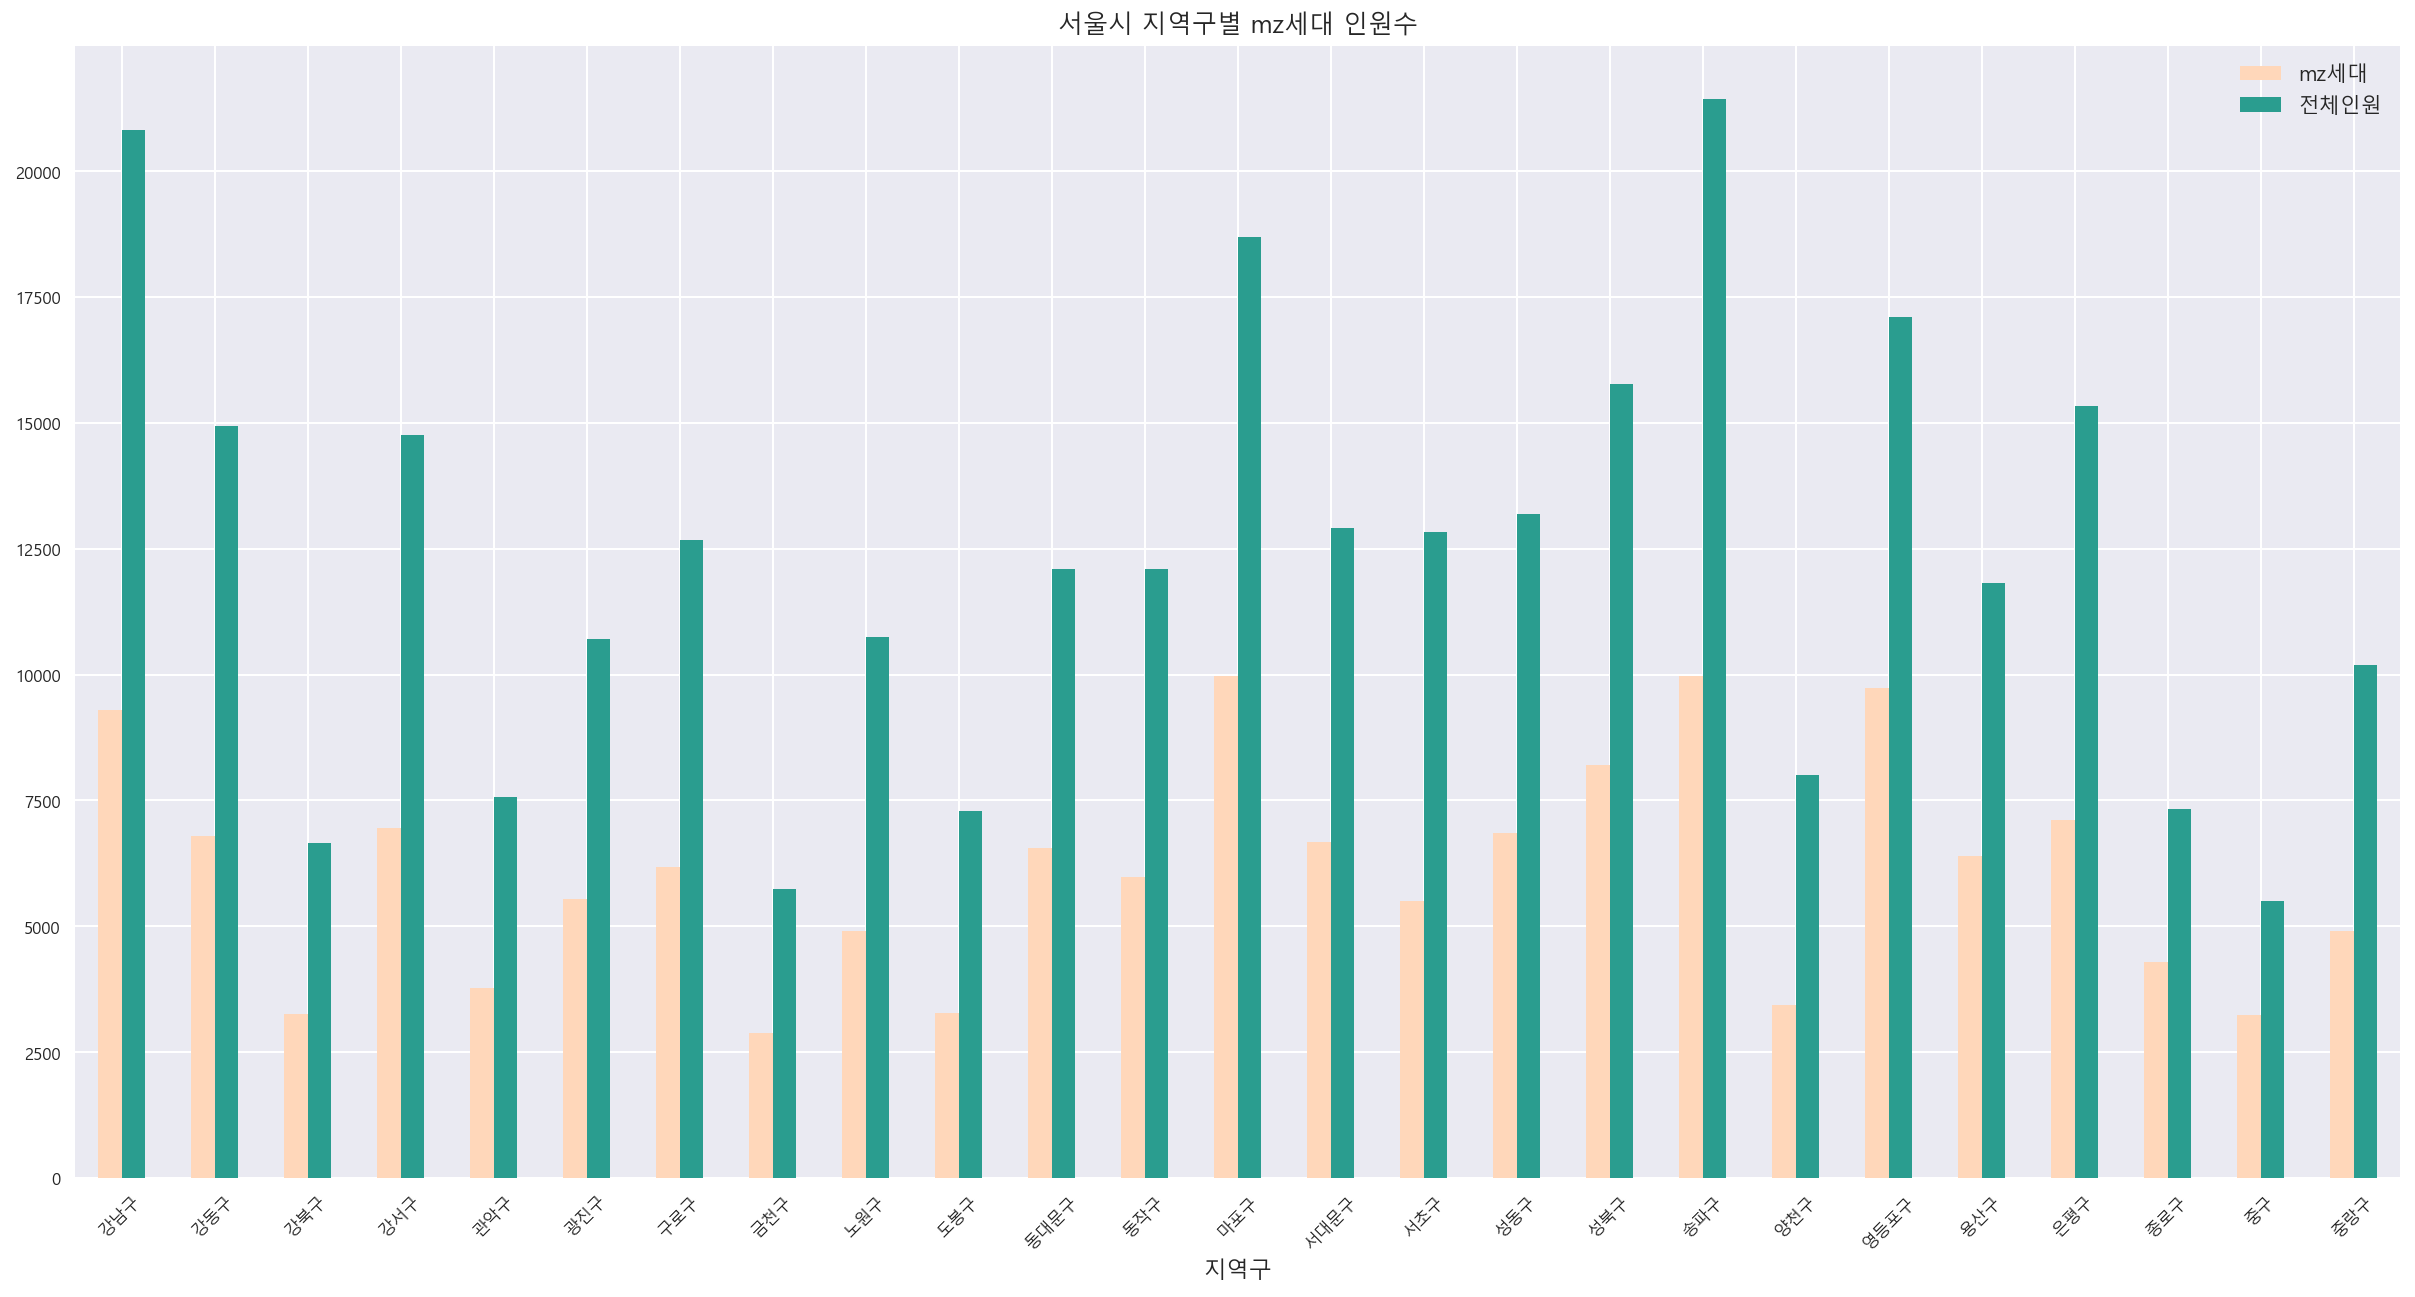

In [27]:
bc_seoul = bc[bc['고객소재지_광역시도']=='서울특별시']

x = mz_seoul.groupby('고객소재지_시군구')['mz세대'].count().reset_index()
y  = bc_seoul.groupby('고객소재지_시군구')['mz세대'].count().reset_index()

pd.options.display.float_format = '{:.3f}'.format # 소숫점 3자리까지 표현해주는 판다스 옵션


mz_zone3 = pd.merge(x,y,on='고객소재지_시군구')
mz_zone3.columns=['지역구','mz세대','전체인원']

mz_zone3['mz세대'] = mz_zone3['mz세대'].astype('float')
mz_zone3['전체인원'] = mz_zone3['전체인원'].astype('float')
mz_zone3['분포']= mz_zone3.mz세대/mz_zone3.전체인원

my_colors = [ '#ffd7ba','#2a9d8f']
mz_zone3.plot.bar(x='지역구',y=['mz세대','전체인원'],rot=45,color=my_colors,fontsize=8,title="서울시 지역구별 mz세대 인원수",figsize=(20,10))

In [28]:
mz_zone3.sort_values(by='분포',ascending=False).head(5)

,지역구,mz세대,전체인원,분포
23,중구,3248.000,5493.000,0.591
22,종로구,4291.000,7331.000,0.585
19,영등포구,9733.000,17094.000,0.569
10,동대문구,6560.000,12087.000,0.543
20,용산구,6402.000,11816.000,0.542


In [29]:
mz_zone3.sort_values(by='분포',ascending=True).head(5)

,지역구,mz세대,전체인원,분포
14,서초구,5500.000,12833.000,0.429
18,양천구,3439.000,8002.000,0.430
0,강남구,9304.000,20806.000,0.447
9,도봉구,3274.000,7296.000,0.449
1,강동구,6788.000,14932.000,0.455


In [30]:
junggu = bc_seoul[bc_seoul['고객소재지_시군구']=='중구']

In [31]:
# 중구 (mz세대 비율 상위 1개구 2019년 품목별 매출 순위 )
junggu2019 = junggu[(junggu['기준년월']==201903) | (junggu['기준년월']==201909)]
junggu2019.drop(['기준년월'],axis=1,inplace=True)
junggu2019_total = junggu2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수'].sum().reset_index()
junggu2019_avg = junggu2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

junggu2019_consume = pd.merge(junggu2019_total,junggu2019_avg)

junggu_mz_2019 = junggu2019_consume.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False).head(15)

junggu_mz_2019['매출순위'] = junggu_mz_2019['매출건수'].rank(method='min',ascending=False)
junggu_mz_2019

,품목대분류명,품목중분류명,매출금액,매출건수,매출평균,매출순위
1,e상품/서비스,o2o서비스,1108140187,26410,49379.453,1.000
0,e상품/서비스,e머니/상품권,174710682,3825,47903.672,2.000
19,생활,생활용품,126354891,3422,35262.211,3.000
28,여가/스포츠,취미/특기,143502998,2724,77817.941,4.000
22,식품,신선/요리재료,102134390,2426,43178.631,5.000
27,여가/스포츠,여행,230550245,2308,115126.135,6.000
38,전자,디지털,133629425,1582,78964.636,7.000
23,식품,음료,48953792,1543,32660.467,8.000
8,건강,건강식품,81803803,1537,54573.763,9.000
21,식품,가공식품,56249423,1517,39189.938,10.000


In [32]:
# 중구 (mz세대 비율 상위 1개구 2020년,21년 품목별 매출 순위 )
junggu2021 = junggu[(junggu['기준년월']==202003) | (junggu['기준년월']==202009) | (junggu['기준년월']==202103)]
junggu2021.drop(['기준년월'],axis=1,inplace=True)

junggu2021_total = junggu2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수'].sum().reset_index()
junggu2021_avg = junggu2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

junggu2021_consume = pd.merge(junggu2021_total,junggu2021_avg)
junggu_mz_2021 = junggu2021_consume.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False).head(15)

junggu_mz_2021['매출순위'] = junggu_mz_2021['매출건수'].rank(method='min',ascending=False)
junggu_mz_2021


,품목대분류명,품목중분류명,매출금액,매출건수,매출평균,매출순위
1,e상품/서비스,o2o서비스,2466065566,63857,40475.221,1.000
23,식품,신선/요리재료,297821826,7347,40062.288,2.000
0,e상품/서비스,e머니/상품권,364765434,6741,52816.512,3.000
20,생활,생활용품,232834914,6195,38391.284,4.000
29,여가/스포츠,취미/특기,294243873,5744,61254.886,5.000
22,식품,가공식품,158852414,4502,34781.764,6.000
8,건강,건강식품,238299847,3993,62989.241,7.000
39,전자,디지털,304029563,3423,95433.998,8.000
24,식품,음료,90499650,3253,27813.904,9.000
28,여가/스포츠,여행,209441971,2725,86494.661,10.000


In [33]:
# 중구 mz세대 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
junggu_cov_mz = pd.merge(junggu_mz_2019,junggu_mz_2021,how='inner',on='품목중분류명') 
junggu_cov_mz.drop(['품목대분류명_y'],axis=1,inplace=True)
junggu_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','매출건수前','매출평균前','순위前','매출금액後','매출건수後','매출평균後','순위後']

junggu_cov_mz['변동순위'] = junggu_cov_mz['순위前'] - junggu_cov_mz['순위後']
junggu_cov_mz

,품목대분류,품목중분류,매출금액前,매출건수前,매출평균前,순위前,매출금액後,매출건수後,매출평균後,순위後,변동순위
0,e상품/서비스,o2o서비스,1108140187,26410,49379.453,1.000,2466065566,63857,40475.221,1.000,0.000
1,e상품/서비스,e머니/상품권,174710682,3825,47903.672,2.000,364765434,6741,52816.512,3.000,-1.000
2,생활,생활용품,126354891,3422,35262.211,3.000,232834914,6195,38391.284,4.000,-1.000
3,여가/스포츠,취미/특기,143502998,2724,77817.941,4.000,294243873,5744,61254.886,5.000,-1.000
4,식품,신선/요리재료,102134390,2426,43178.631,5.000,297821826,7347,40062.288,2.000,3.000
5,여가/스포츠,여행,230550245,2308,115126.135,6.000,209441971,2725,86494.661,10.000,-4.000
6,전자,디지털,133629425,1582,78964.636,7.000,304029563,3423,95433.998,8.000,-1.000
7,식품,음료,48953792,1543,32660.467,8.000,90499650,3253,27813.904,9.000,-1.000
8,건강,건강식품,81803803,1537,54573.763,9.000,238299847,3993,62989.241,7.000,2.000
9,식품,가공식품,56249423,1517,39189.938,10.000,158852414,4502,34781.764,6.000,4.000


In [34]:
# 종로구 만 따로 분류
jongro = bc_seoul[bc_seoul['고객소재지_시군구']=='중구']

# 종로구 (mz세대 비율 상위 2위 2019년 품목별 매출 순위 )
jongro2019 = jongro[(jongro['기준년월']==201903) | (jongro['기준년월']==201909)]
jongro2019.drop(['기준년월'],axis=1,inplace=True)
jongro2019_total = jongro2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수'].sum().reset_index()
jongro2019_avg = jongro2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

jongro2019_consume = pd.merge(jongro2019_total,jongro2019_avg)

jongro_mz_2019 = jongro2019_consume.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False).head(15)

jongro_mz_2019['매출순위'] = jongro_mz_2019['매출건수'].rank(method='min',ascending=False)
jongro_mz_2019

# 종로구 (mz세대 비율 상위 2위 2020년,21년 품목별 매출 순위 )
jongro2021 = jongro[(jongro['기준년월']==202003) | (jongro['기준년월']==202009) | (jongro['기준년월']==202103)]
jongro2021.drop(['기준년월'],axis=1,inplace=True)

jongro2021_total = jongro2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수'].sum().reset_index()
jongro2021_avg = jongro2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

jongro2021_consume = pd.merge(jongro2021_total,jongro2021_avg)
jongro_mz_2021 = jongro2021_consume.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False).head(15)

jongro_mz_2021['매출순위'] = jongro_mz_2021['매출건수'].rank(method='min',ascending=False)
jongro_mz_2021

# 종로구 mz세대 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
jongro_cov_mz = pd.merge(jongro_mz_2019,jongro_mz_2021,how='inner',on='품목중분류명') 
jongro_cov_mz.drop(['품목대분류명_y'],axis=1,inplace=True)
jongro_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','매출건수前','매출평균前','순위前','매출금액後','매출건수後','매출평균後','순위後']

jongro_cov_mz['변동순위'] = jongro_cov_mz['순위前'] - jongro_cov_mz['순위後']
jongro_cov_mz

,품목대분류,품목중분류,매출금액前,매출건수前,매출평균前,순위前,매출금액後,매출건수後,매출평균後,순위後,변동순위
0,e상품/서비스,o2o서비스,1108140187,26410,49379.453,1.000,2466065566,63857,40475.221,1.000,0.000
1,e상품/서비스,e머니/상품권,174710682,3825,47903.672,2.000,364765434,6741,52816.512,3.000,-1.000
2,생활,생활용품,126354891,3422,35262.211,3.000,232834914,6195,38391.284,4.000,-1.000
3,여가/스포츠,취미/특기,143502998,2724,77817.941,4.000,294243873,5744,61254.886,5.000,-1.000
4,식품,신선/요리재료,102134390,2426,43178.631,5.000,297821826,7347,40062.288,2.000,3.000
5,여가/스포츠,여행,230550245,2308,115126.135,6.000,209441971,2725,86494.661,10.000,-4.000
6,전자,디지털,133629425,1582,78964.636,7.000,304029563,3423,95433.998,8.000,-1.000
7,식품,음료,48953792,1543,32660.467,8.000,90499650,3253,27813.904,9.000,-1.000
8,건강,건강식품,81803803,1537,54573.763,9.000,238299847,3993,62989.241,7.000,2.000
9,식품,가공식품,56249423,1517,39189.938,10.000,158852414,4502,34781.764,6.000,4.000


In [64]:
# 서초구 만 따로 분류
seocho = bc_seoul[bc_seoul['고객소재지_시군구']=='서초구']

# 서초구 (mz세대 비율 하위 1위 2019년 품목별 매출 순위 )
seocho2019 = seocho[(seocho['기준년월']==201903) | (seocho['기준년월']==201909)]
seocho2019.drop(['기준년월'],axis=1,inplace=True)
seocho2019_total = seocho2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수'].sum().reset_index()
seocho2019_avg = seocho2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

seocho2019_consume = pd.merge(seocho2019_total,seocho2019_avg)

seocho_mz_2019 = seocho2019_consume.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False).head(15)

seocho_mz_2019['매출순위'] = seocho_mz_2019['매출건수'].rank(method='min',ascending=False)
seocho_mz_2019

# 서초구 (mz세대 비율 하위 1위 2020년,21년 품목별 매출 순위 )
seocho2021 = seocho[(seocho['기준년월']==202003) | (seocho['기준년월']==202009) | (seocho['기준년월']==202103)]
seocho2021.drop(['기준년월'],axis=1,inplace=True)

seocho2021_total = seocho2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수'].sum().reset_index()
seocho2021_avg = seocho2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

seocho2021_consume = pd.merge(seocho2021_total,seocho2021_avg)
seocho_mz_2021 = seocho2021_consume.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False).head(15)

seocho_mz_2021['매출순위'] = seocho_mz_2021['매출건수'].rank(method='min',ascending=False)
seocho_mz_2021

# 서초구 mz세대 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
seocho_cov_mz = pd.merge(seocho_mz_2019,seocho_mz_2021,how='inner',on='품목중분류명') 
seocho_cov_mz.drop(['품목대분류명_y'],axis=1,inplace=True)
seocho_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','매출건수前','매출평균前','순위前','매출금액後','매출건수後','매출평균後','순위後']

seocho_cov_mz['변동순위'] = seocho_cov_mz['순위前'] - seocho_cov_mz['순위後']
seocho_cov_mz

,품목대분류,품목중분류,매출금액前,매출건수前,매출평균前,순위前,매출금액後,매출건수後,매출평균後,순위後,변동순위
0,e상품/서비스,o2o서비스,4411111703,92019,51422.576,1.000,9137900642,200628,44686.317,1.000,0.000
1,생활,생활용품,552646256,14109,38980.143,2.000,1016972182,24949,39886.974,3.000,-1.000
2,여가/스포츠,취미/특기,860507130,13760,68647.942,3.000,1746604679,24005,78328.862,5.000,-2.000
3,e상품/서비스,e머니/상품권,617062871,13383,46155.915,4.000,1562887198,24325,61245.782,4.000,0.000
4,식품,신선/요리재료,528011410,12204,42583.941,5.000,1464583430,32528,42146.046,2.000,3.000
5,여가/스포츠,여행,1367761740,9948,132869.435,6.000,1244669036,12098,102893.576,10.000,-4.000
6,건강,건강식품,459816542,7843,60627.926,7.000,1215023899,18342,62234.182,7.000,0.000
7,전자,디지털,721759486,7641,100573.872,8.000,1434958957,13275,110303.315,9.000,-1.000
8,식품,가공식품,268615535,7297,38002.811,9.000,716454055,18489,36623.085,6.000,3.000
9,식품,음료,229799504,7296,31100.952,10.000,458745579,14451,31243.662,8.000,2.000


In [46]:
bc_10 = bc[bc['연령']==1]

In [48]:
bc_10.가구생애주기.unique() # 10대의 가구생애주기가 1인가구뿐인것으로 봐서, 만 18세또는 만 19세로만 이루어진 데이터로 추측

array(['1인가구'], dtype=object)

In [55]:
bc_20 = bc[(bc['연령']==2) | (bc['연령']==1)]
bc_20
bc_20.연령.unique()

array([2, 1], dtype=int64)

In [57]:
bc_30 = bc[bc['연령']==3]

In [128]:
# Z세대 10,20대만 따로 분석
bc_20

# z세대 2019년도 품목별 매출건수 상위 top 15
bc_20_2019 = bc_20[(bc_20['기준년월']==201903) | (bc_20['기준년월']==201909)]
bc_20_2019.drop(['기준년월'],axis=1,inplace=True)

bc_20_2019['분기당_평균_매출건수'] = (bc_20_2019['매출건수'] / 2).astype('int64')
bc_20_2019_total = bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
bc_20_2019_avg = bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

bc_20_2019_consume = pd.merge(bc_20_2019_total,bc_20_2019_avg)

bc_20_z_2019 = bc_20_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

bc_20_z_2019['매출순위'] = bc_20_z_2019['분기당_평균_매출건수'].rank(method='min',ascending=False)

bc_20_z_2019


,품목대분류명,품목중분류명,매출금액,매출건수,분기당_평균_매출건수,매출평균,매출순위
1,e상품/서비스,o2o서비스,24564450882,782547,390311,32848.687,1.000
0,e상품/서비스,e머니/상품권,2968931701,148795,73827,19984.601,2.000
29,여가/스포츠,취미/특기,5468192265,138881,68841,43062.531,3.000
28,여가/스포츠,여행,5582303425,87925,43408,66316.790,4.000
39,전자,디지털,4272390174,69529,34193,65249.525,5.000
20,생활,생활용품,1738900646,50880,24966,35270.210,6.000
26,여가/스포츠,문화,1246769018,30226,14791,43272.443,7.000
22,식품,가공식품,823687308,29229,14218,28831.580,8.000
34,의류,여성의류,1297338759,28345,13841,47406.995,9.000
2,e상품/서비스,모바일상품,434315764,28089,13708,14938.488,10.000


In [139]:
# z세대 2020,21년도 품목별 매출건수 상위 top 15
bc_20_2021 = bc_20[(bc_20['기준년월']==202003) | (bc_20['기준년월']==202009) | (bc_20['기준년월']==202103)]
bc_20_2021.drop(['기준년월'],axis=1,inplace=True)

bc_20_2021['분기당_평균_매출건수'] = (bc_20_2021['매출건수'] / 3).astype('int64')
bc_20_2021_total = bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
bc_20_2021_avg = bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

bc_20_2021_consume = pd.merge(bc_20_2021_total,bc_20_2021_avg)
bc_20_z_2021 = bc_20_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

bc_20_z_2021['매출순위'] = bc_20_z_2021['분기당_평균_매출건수'].rank(method='min',ascending=False)
bc_20_z_2021



,품목대분류명,품목중분류명,매출금액,매출건수,분기당_평균_매출건수,매출평균,매출순위
1,e상품/서비스,o2o서비스,50574970418,1698830,564156,29135.767,1.000
30,여가/스포츠,취미/특기,11123596806,277555,91132,40837.800,2.000
0,e상품/서비스,e머니/상품권,6507264618,272614,89585,24567.094,3.000
40,전자,디지털,8940922996,134294,43547,70372.978,4.000
29,여가/스포츠,여행,5227935054,98291,31873,56762.139,5.000
21,생활,생활용품,2914470092,91464,29522,33558.078,6.000
23,식품,가공식품,1970559750,76057,24452,26154.168,7.000
24,식품,신선/요리재료,2365412140,71344,22941,35112.521,8.000
2,e상품/서비스,모바일상품,885010159,60427,19350,14543.579,9.000
8,건강,건강식품,2302117132,54151,17259,43067.701,10.000


In [143]:
# z세대 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
bc20_cov_mz = pd.merge(bc_20_z_2019,bc_20_z_2021,how='inner',on='품목중분류명') 
bc20_cov_mz.drop(['품목대분류명_y'],axis=1,inplace=True)
bc20_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','매출건수前','분기당_평균_매출건수前','매출평균前','순위前','매출금액後','매출건수後','분기당_평균_매출건수後','매출평균後','순위後']

bc20_cov_mz['변동순위'] = bc20_cov_mz['순위前'] - bc20_cov_mz['순위後']
bc20_cov_mz

,품목대분류,품목중분류,매출금액前,매출건수前,분기당_평균_매출건수前,매출평균前,순위前,매출금액後,매출건수後,분기당_평균_매출건수後,매출평균後,순위後,변동순위
0,e상품/서비스,o2o서비스,24564450882,782547,390311,32848.687,1.000,50574970418,1698830,564156,29135.767,1.000,0.000
1,e상품/서비스,e머니/상품권,2968931701,148795,73827,19984.601,2.000,6507264618,272614,89585,24567.094,3.000,-1.000
2,여가/스포츠,취미/특기,5468192265,138881,68841,43062.531,3.000,11123596806,277555,91132,40837.800,2.000,1.000
3,여가/스포츠,여행,5582303425,87925,43408,66316.790,4.000,5227935054,98291,31873,56762.139,5.000,-1.000
4,전자,디지털,4272390174,69529,34193,65249.525,5.000,8940922996,134294,43547,70372.978,4.000,1.000
5,생활,생활용품,1738900646,50880,24966,35270.210,6.000,2914470092,91464,29522,33558.078,6.000,0.000
6,식품,가공식품,823687308,29229,14218,28831.580,8.000,1970559750,76057,24452,26154.168,7.000,1.000
7,의류,여성의류,1297338759,28345,13841,47406.995,9.000,1601490806,35303,11186,47303.856,14.000,-5.000
8,e상품/서비스,모바일상품,434315764,28089,13708,14938.488,10.000,885010159,60427,19350,14543.579,9.000,1.000
9,식품,신선/요리재료,940424739,27371,13358,36172.438,11.000,2365412140,71344,22941,35112.521,8.000,3.000


In [135]:
# m세대 30대만 따로 분석
bc_30

# m세대 2019년도 품목별 매출건수 상위 top 15
bc_30_2019 = bc_30[(bc_30['기준년월']==201903) | (bc_30['기준년월']==201909)]
bc_30_2019.drop(['기준년월'],axis=1,inplace=True)

bc_30_2019['분기당_평균_매출건수'] = (bc_30_2019['매출건수'] / 2).astype('int64')
bc_30_2019_total = bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
bc_30_2019_avg = bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

bc_30_2019_consume = pd.merge(bc_30_2019_total,bc_30_2019_avg)

bc_30_m_2019 = bc_30_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

bc_30_m_2019['매출순위'] = bc_30_m_2019['분기당_평균_매출건수'].rank(method='min',ascending=False)

bc_30_m_2019


,품목대분류명,품목중분류명,매출금액,매출건수,분기당_평균_매출건수,매출평균,매출순위
1,e상품/서비스,o2o서비스,50880219561,1395347,696677,38192.169,1.000
20,생활,생활용품,7682095402,223087,110834,36026.179,2.000
0,e상품/서비스,e머니/상품권,9161665441,208370,103555,43772.409,3.000
29,여가/스포츠,취미/특기,6479882546,138880,68842,55818.677,4.000
28,여가/스포츠,여행,13030675035,131344,65032,103133.400,5.000
23,식품,신선/요리재료,5198020634,130490,64625,41087.387,6.000
42,출산/육아,육아용품서비스,4443674309,126582,62787,39027.390,7.000
41,출산/육아,어린이용품서비스,4619376738,117639,58310,42264.075,8.000
8,건강,건강식품,5172792326,106191,52541,52502.954,9.000
39,전자,디지털,7141593963,98796,48799,78155.316,10.000


In [136]:
# m세대 2020,21년도 품목별 매출건수 상위 top 15
bc_30_2021 = bc_30[(bc_30['기준년월']==202003) | (bc_30['기준년월']==202009) | (bc_30['기준년월']==202103)]
bc_30_2021.drop(['기준년월'],axis=1,inplace=True)

bc_30_2021['분기당_평균_매출건수'] = (bc_30_2021['매출건수'] / 3).astype('int64')
bc_30_2021_total = bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
bc_30_2021_avg = bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

bc_30_2021_consume = pd.merge(bc_30_2021_total,bc_30_2021_avg)
bc_30_m_2021 = bc_30_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출평균','매출금액'],ascending=False).head(15)

bc_30_m_2021['매출순위'] = bc_30_m_2021['분기당_평균_매출건수'].rank(method='min',ascending=False)
bc_30_m_2021



,품목대분류명,품목중분류명,매출금액,매출건수,분기당_평균_매출건수,매출평균,매출순위
1,e상품/서비스,o2o서비스,96327614769,2754328,915745,36064.906,1.000
0,e상품/서비스,e머니/상품권,17808025226,323809,106508,51951.537,2.000
21,생활,생활용품,10308611454,298133,97933,36864.563,3.000
24,식품,신선/요리재료,10429563949,272130,89341,38751.087,4.000
30,여가/스포츠,취미/특기,11282934232,220528,72156,58346.523,5.000
23,식품,가공식품,6169175656,193909,63330,32801.892,6.000
8,건강,건강식품,9685444494,189020,61733,51851.822,7.000
25,식품,음료,4263663389,163007,53122,26608.065,8.000
43,출산/육아,육아용품서비스,5395520992,141794,46187,40916.164,9.000
40,전자,디지털,12983591471,140831,45694,98853.688,10.000


In [142]:
# m세대 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
bc30_cov_mz = pd.merge(bc_30_m_2019,bc_30_m_2021,how='inner',on='품목중분류명') 
bc30_cov_mz.drop(['품목대분류명_y'],axis=1,inplace=True)
bc30_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','매출건수前','분기당_평균_매출건수前','매출평균前','순위前','매출금액後','매출건수後','분기당_평균_매출건수後','매출평균後','순위後']

bc30_cov_mz['변동순위'] = bc30_cov_mz['순위前'] - bc30_cov_mz['순위後']
bc30_cov_mz

,품목대분류,품목중분류,매출금액前,매출건수前,분기당_평균_매출건수前,매출평균前,순위前,매출금액後,매출건수後,분기당_평균_매출건수後,매출평균後,순위後,변동순위
0,e상품/서비스,o2o서비스,50880219561,1395347,696677,38192.169,1.000,96327614769,2754328,915745,36064.906,1.000,0.000
1,생활,생활용품,7682095402,223087,110834,36026.179,2.000,10308611454,298133,97933,36864.563,3.000,-1.000
2,e상품/서비스,e머니/상품권,9161665441,208370,103555,43772.409,3.000,17808025226,323809,106508,51951.537,2.000,1.000
3,여가/스포츠,취미/특기,6479882546,138880,68842,55818.677,4.000,11282934232,220528,72156,58346.523,5.000,-1.000
4,여가/스포츠,여행,13030675035,131344,65032,103133.400,5.000,9454153748,124570,40380,77003.923,12.000,-7.000
5,식품,신선/요리재료,5198020634,130490,64625,41087.387,6.000,10429563949,272130,89341,38751.087,4.000,2.000
6,출산/육아,육아용품서비스,4443674309,126582,62787,39027.390,7.000,5395520992,141794,46187,40916.164,9.000,-2.000
7,출산/육아,어린이용품서비스,4619376738,117639,58310,42264.075,8.000,5639767796,134975,44009,44439.632,11.000,-3.000
8,건강,건강식품,5172792326,106191,52541,52502.954,9.000,9685444494,189020,61733,51851.822,7.000,2.000
9,전자,디지털,7141593963,98796,48799,78155.316,10.000,12983591471,140831,45694,98853.688,10.000,0.000


In [79]:
bc_mz.groupby('연령')['연령'].count()
# 10,20 과 30대를 나눴을 때 전체 총 인원수는 비슷함.

연령
1      5902
2     98525
3    152348
Name: 연령, dtype: int64

In [83]:
bc_20.groupby('성별')['성별'].count() 
# 20대의 경우 bc 카드를 사용하는 여자 회원 수가 남자보다 2.07배가량 많았다.

성별
0    33951
1    70476
Name: 성별, dtype: int64

In [85]:
bc_30.groupby('성별')['성별'].count()
# 30대의 경우 bc 카드를 사용하는 여자 회원 수가 남자보다 1.7배가량 많았다.

성별
0    56032
1    96316
Name: 성별, dtype: int64

In [88]:
bc_20.groupby('가구생애주기')['가구생애주기'].count() 
# 20대의 경우, 1인가구와 신혼영유아가구의 비율이 9대 1이었다.

가구생애주기
1인가구       90981
신혼영유아가구    13446
Name: 가구생애주기, dtype: int64

In [90]:
bc_30.groupby('가구생애주기')['가구생애주기'].count()
# 30대의 경우, 신혼영유아가구가 가장 많았으며, 8:1.5:0.5의 비율을 이룬다.

가구생애주기
1인가구        26526
신혼영유아가구    119656
초중고자녀가구      6166
Name: 가구생애주기, dtype: int64

In [94]:
# z세대 코로나이전 가구유형
family_Type_z2019 = bc_20_2019.groupby('가구생애주기')['mz세대'].count()
family_Type_z2019

가구생애주기
1인가구       31556
신혼영유아가구     5460
Name: mz세대, dtype: int64

In [102]:
# z세대 코로나이후 가구유형
family_Type_z2021 = bc_20_2021.groupby('가구생애주기')['mz세대'].count()
family_Type_z2021

가구생애주기
1인가구       59425
신혼영유아가구     7986
Name: mz세대, dtype: int64

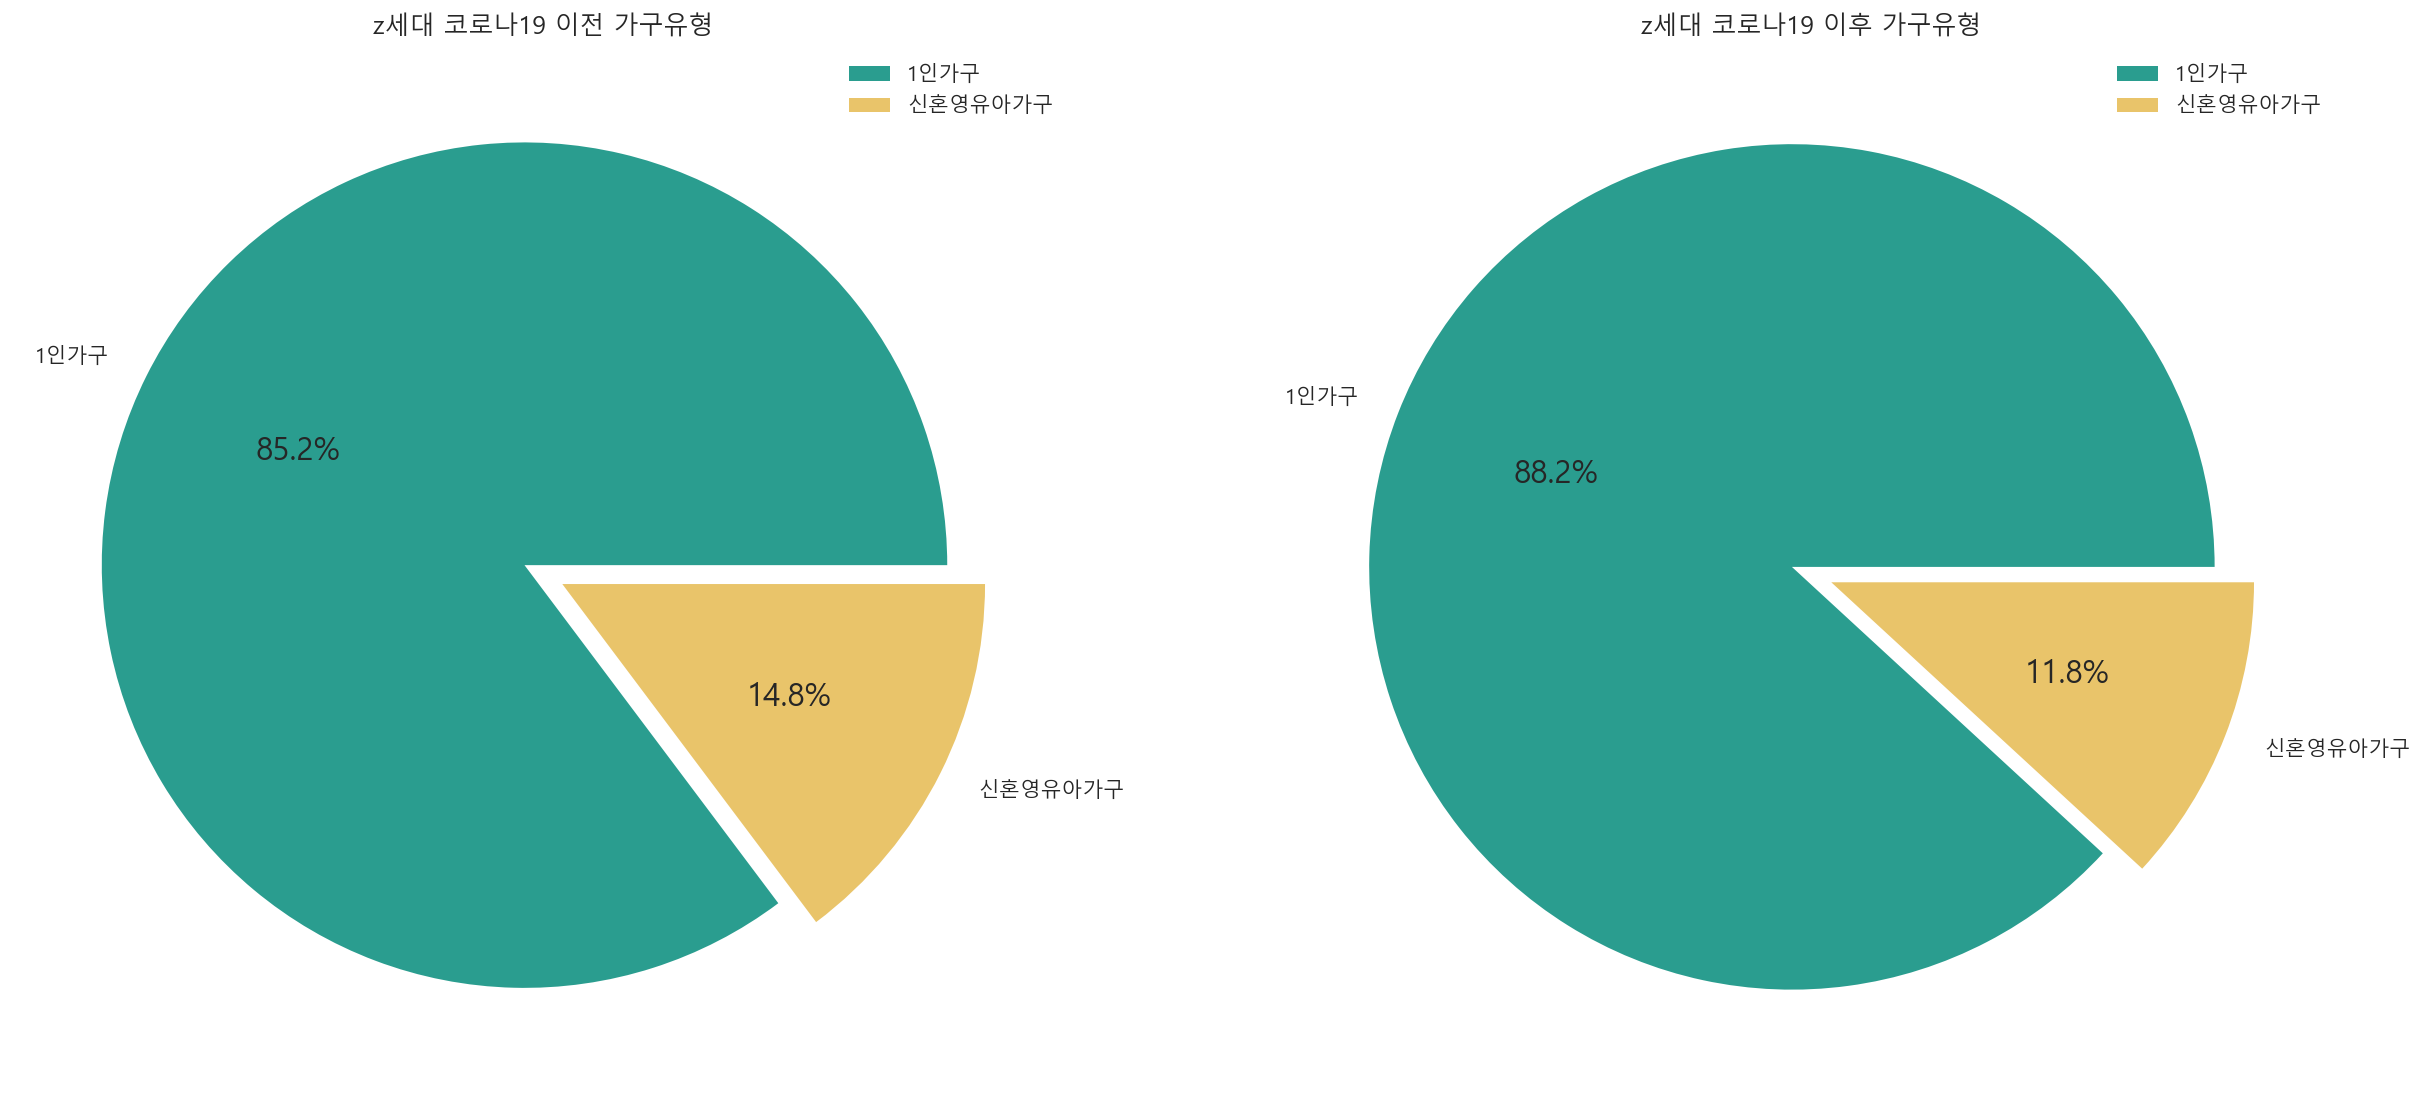

In [121]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

llist = ['1인가구','신혼영유아가구']
explode = [0.05, 0.05]
color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
plt.rcParams["font.size"]=15

ax1.pie(family_Type_z2019,autopct='%1.1f%%',labels=llist,explode=explode,colors=color)
#ax1.bar(card1.카드사명,card1.비중,color=colors,label='단위 : %')

ax2.pie(family_Type_z2021,autopct='%1.1f%%',labels=llist,explode=explode,colors=color)    
#ax2= family_Type_z2021.plot(kind='pie',autopct='%1.1f%%',fontsize=10)

ax1.set_title('z세대 코로나19 이전 가구유형')
ax2.set_title('z세대 코로나19 이후 가구유형')

ax1.legend(llist)
ax2.legend(llist)

In [122]:
# m세대 코로나이전 가구유형
family_Type_m2019 = bc_30_2019.groupby('가구생애주기')['mz세대'].count()
family_Type_m2019

가구생애주기
1인가구        7759
신혼영유아가구    46419
초중고자녀가구     1748
Name: mz세대, dtype: int64

In [123]:
# m세대 코로나이후 가구유형
family_Type_m2021 = bc_30_2021.groupby('가구생애주기')['mz세대'].count()
family_Type_m2021

가구생애주기
1인가구       18767
신혼영유아가구    73237
초중고자녀가구     4418
Name: mz세대, dtype: int64

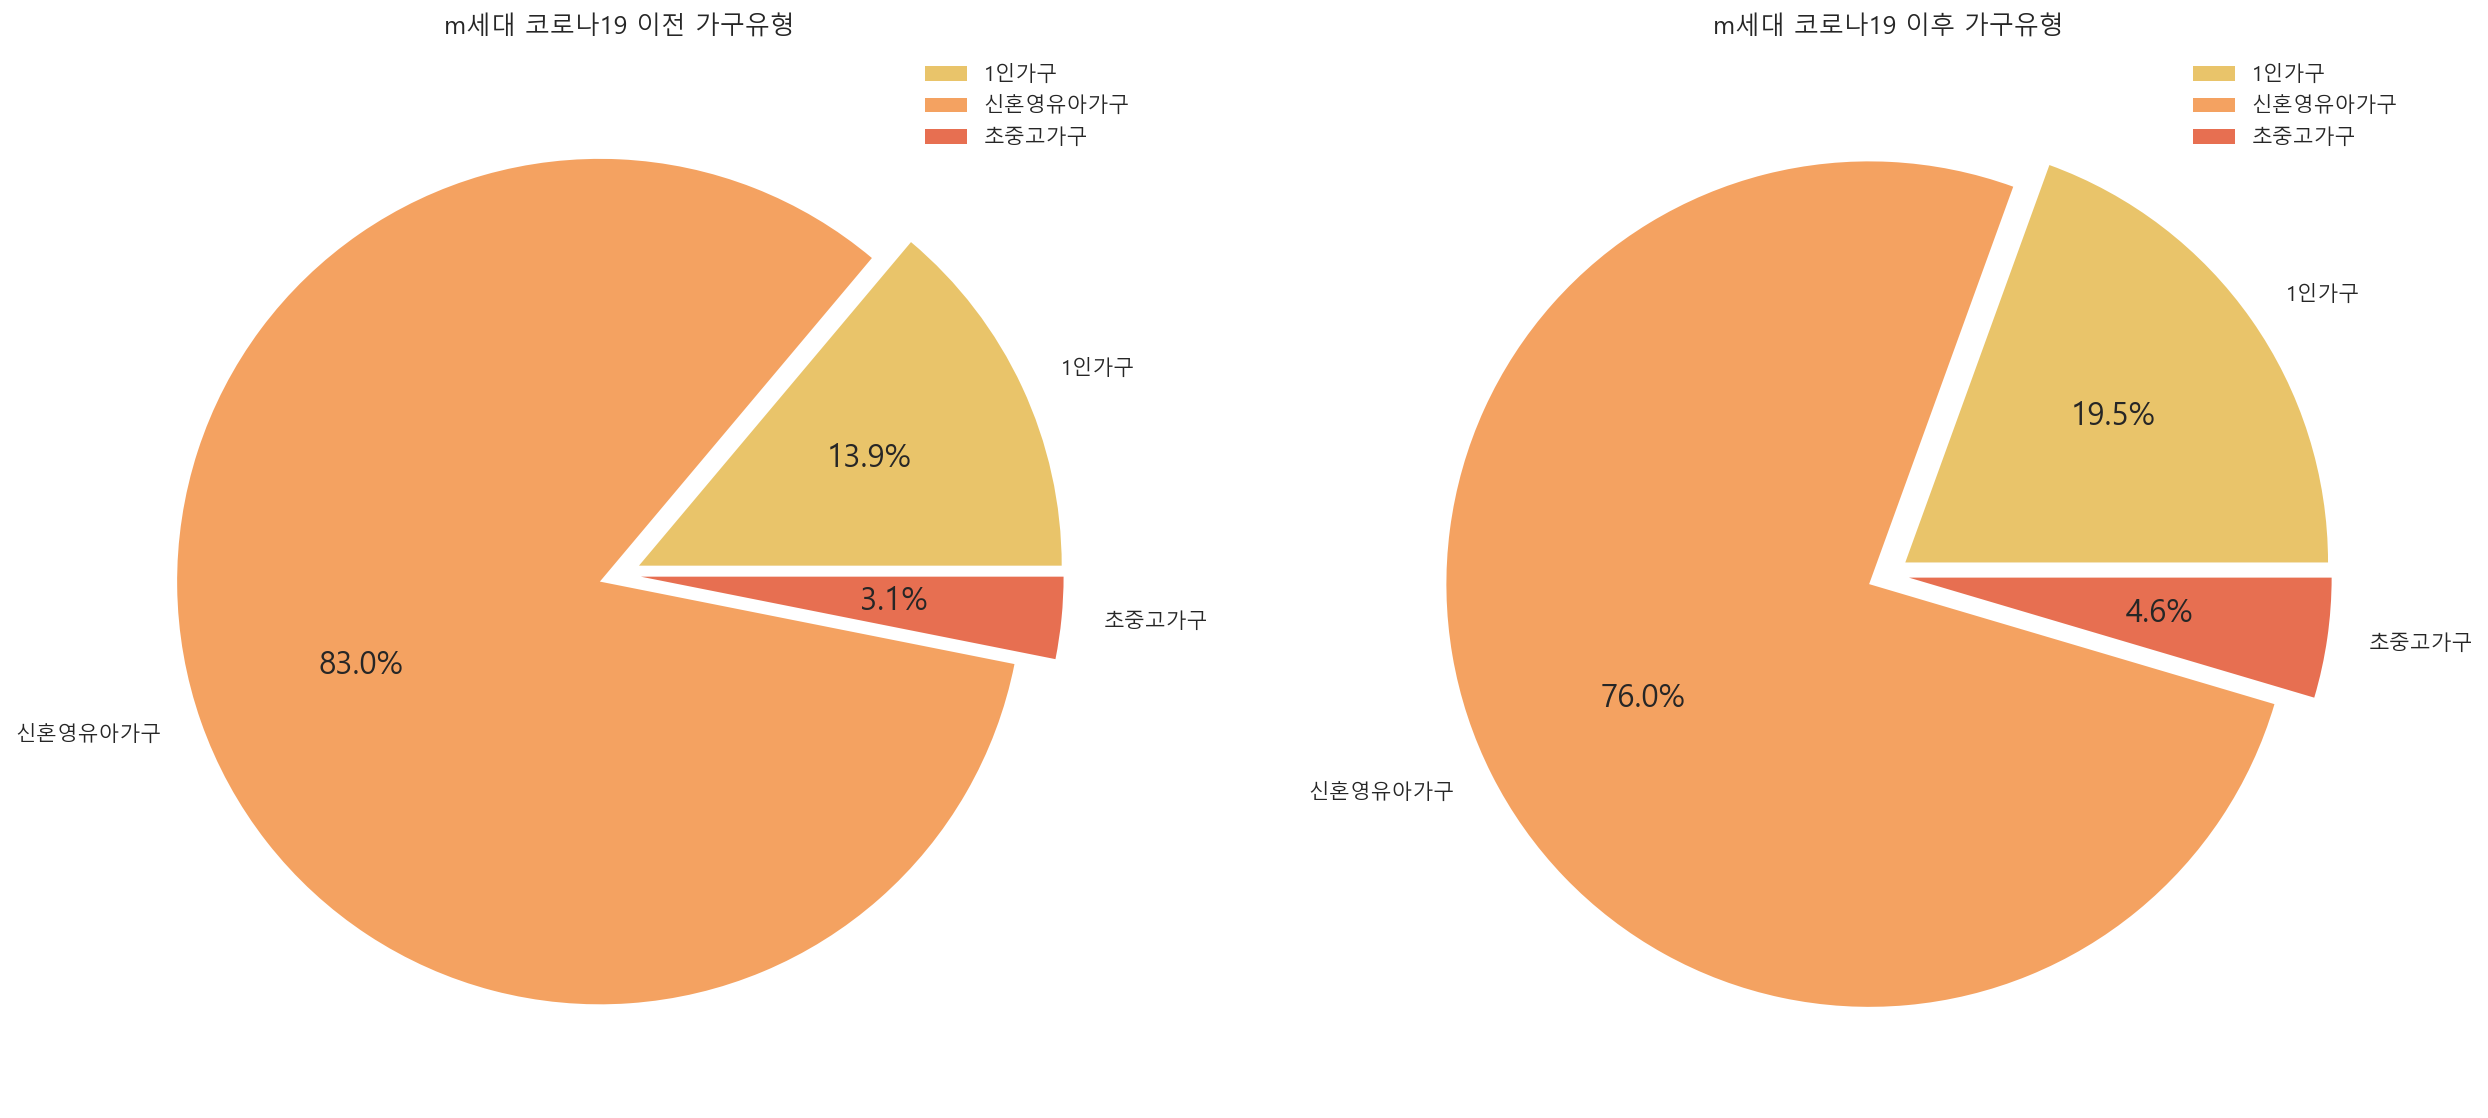

In [125]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

llist = ['1인가구','신혼영유아가구','초중고가구']
explode = [0.05, 0.05,0.05]
color=['#e9c46a', '#f4a261', '#e76f51']
plt.rcParams["font.size"]=15

ax1.pie(family_Type_m2019,autopct='%1.1f%%',labels=llist,explode=explode,colors=color)


ax2.pie(family_Type_m2021,autopct='%1.1f%%',labels=llist,explode=explode,colors=color)    


ax1.set_title('m세대 코로나19 이전 가구유형')
ax2.set_title('m세대 코로나19 이후 가구유형')

ax1.legend(llist)
ax2.legend(llist)